In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os
from prepare import clean_data,train_validate_test_split
from acquire import get_titanic_data 
from prepare import clean_titanic
from env import host,db,protocol,password,user,mysqlcon
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import acquire
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import env
from sklearn.neighbors import KNeighborsClassifier

Exercises

Create a new notebook, knn_model, and work with the titanic dataset to answer the following:

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 1-3 setting k to 10

Run through steps 1-3 setting k to 20

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Which model performs best on our out-of-sample data from validate?

In [2]:
df = get_titanic_data()

In [3]:
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [4]:
clean_titanic(df)

,survived,pclass,age,sibling_spouse,parch,fare,alone,sex_male,embark_town_queenstown,embark_town_southampton,embark_town_southhampton
0,0,3,22.000000,1,0,7.2500,0,1,0,1,0
1,1,1,38.000000,1,0,71.2833,0,0,0,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,1,0
3,1,1,35.000000,1,0,53.1000,0,0,0,1,0
4,0,3,35.000000,0,0,8.0500,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,0,0,1,0,0
887,1,1,19.000000,0,0,30.0000,1,0,0,1,0
888,0,3,29.699118,1,2,23.4500,0,0,0,1,0
889,1,1,26.000000,0,0,30.0000,1,1,0,0,0


In [5]:
df = clean_titanic(df)


Train Validate Test

In [6]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target='survived', seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [7]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived


In [8]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [9]:
X_train.shape, X_validate.shape, X_test.shape

((436, 10), (188, 10), (156, 10))

Train Model

In [10]:
#Create KNN Object
# weights = ['uniform', 'distance']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [11]:
#Fit the model to the training data.
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [12]:
KNeighborsClassifier()

KNeighborsClassifier()

In [13]:
#Make Predictions
#Classify each flower by its estimated species.
y_pred = knn.predict(X_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [14]:
#Estimate Probability
#Estimate the probability of each species, using the training data.
y_pred_proba = knn.predict_proba(X_train)


Evaluate Model

In [15]:
#Compute the Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))


Accuracy of KNN classifier on training set: 0.77


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
#Create a confusion matrix
print(confusion_matrix(y_train, y_pred))


[[221  35]
 [ 65 115]]


In [17]:
#Create a classificaiton report
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.86      0.82       256
           1       0.77      0.64      0.70       180

    accuracy                           0.77       436
   macro avg       0.77      0.75      0.76       436
weighted avg       0.77      0.77      0.77       436



Validate Model

In [18]:
#Evaluate on Out-of-Sample data
#Compute the accuracy of the model when run on the validate dataset.
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on test set: 0.69
Accuracy of KNN classifier on training set: 0.77


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

Visualize Model

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

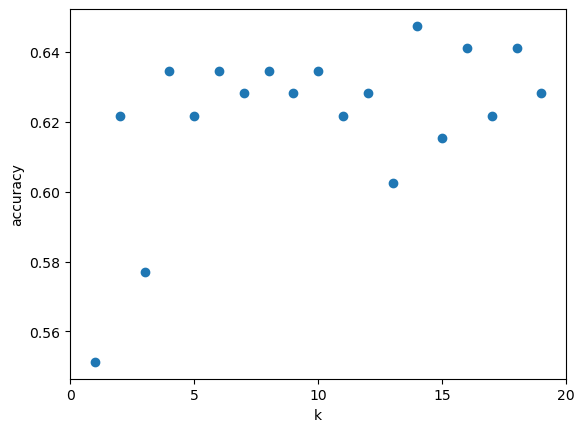

In [19]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()


In [20]:
#Create KNN Object
# weights = ['uniform', 'distance']
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [21]:
def KNN_model(X_train, y_train,n_neighbors):
    '''Create KNN Object,  weights = ['uniform', 'distance'], 
    Fit the model to the training data.
    Make Predictions
    Classify each  by its estimated target.
    Estimate Probability
    Estimate the probability of each target, using the training data.
    #Evaluate on Out-of-Sample data
    Compute the accuracy of the model when run on the validate dataset.'''
    knn = KNeighborsClassifier(n_neighbors= n_neighbors, weights='uniform')
    knn.fit(X_train, y_train)
    KNeighborsClassifier()
    y_pred = knn.predict(X_train)
    y_pred_proba = knn.predict_proba(X_train)
    
    #Evaluate on Out-of-Sample data
    #Compute the accuracy of the model when run on the validate dataset.
    print('Accuracy of KNN classifier on test set: {:.2f}'
    .format(knn.score(X_validate, y_validate)))
    print('Accuracy of KNN classifier on training set: {:.2f}'
    .format(knn.score(X_train, y_train)))
    
    #Create a classificaiton report
    print(classification_report(y_train, y_pred))
    
    return 
    
 
    

In [22]:
KNN_model(X_train,y_train,n_neighbors=10)

Accuracy of KNN classifier on test set: 0.71
Accuracy of KNN classifier on training set: 0.74
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       256
           1       0.78      0.52      0.62       180

    accuracy                           0.74       436
   macro avg       0.75      0.71      0.71       436
weighted avg       0.75      0.74      0.73       436



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?
using n_neighbors=10 provided a higher accuracy score with a slightly higher drop off than n_neighbors=20

Which model performs best on our out-of-sample data from validate?
n_neighbors=10 had a higher accuracy rate on the out of sample data.

In [23]:
KNN_model(X_train,y_train,n_neighbors=20)

Accuracy of KNN classifier on test set: 0.69
Accuracy of KNN classifier on training set: 0.70
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       256
           1       0.72      0.43      0.54       180

    accuracy                           0.70       436
   macro avg       0.71      0.66      0.66       436
weighted avg       0.70      0.70      0.68       436



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [24]:
# iteration:
model_set = []
model_accuracies = {}
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    model_set.append(knn)
    model_accuracies[f'{i}_neighbors'] = {
        'train_score': round(knn.score(X_train, y_train), 2),
        'validate_score': round(knn.score(X_validate, y_validate), 2)}
        

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [25]:
model_accuracies

{'1_neighbors': {'train_score': 0.99, 'validate_score': 0.68},
 '2_neighbors': {'train_score': 0.82, 'validate_score': 0.66},
 '3_neighbors': {'train_score': 0.82, 'validate_score': 0.66},
 '4_neighbors': {'train_score': 0.78, 'validate_score': 0.7},
 '5_neighbors': {'train_score': 0.77, 'validate_score': 0.69},
 '6_neighbors': {'train_score': 0.77, 'validate_score': 0.68},
 '7_neighbors': {'train_score': 0.78, 'validate_score': 0.7},
 '8_neighbors': {'train_score': 0.75, 'validate_score': 0.68},
 '9_neighbors': {'train_score': 0.77, 'validate_score': 0.68}}

In [26]:
KNN_model(X_train,y_train,n_neighbors=2)

Accuracy of KNN classifier on test set: 0.66
Accuracy of KNN classifier on training set: 0.82
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       256
           1       1.00      0.56      0.71       180

    accuracy                           0.82       436
   macro avg       0.88      0.78      0.79       436
weighted avg       0.86      0.82      0.80       436



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [30]:
knn_preds = knn.predict(X_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
def get_metrics(y, y_pred):
    TN, FP, FN, TP = confusion_matrix(y, y_pred).ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)
    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))
    support_0 = train[train.survived == 0].shape[0]
    support_1 = train[train.survived == 1].shape[0]
    print(f'''
    Accuracy: {accuracy}
    True Positive Rate: {TPR}
    True Negative Rate: {TNR}
    False Positive Rate: {FPR}
    False Negative Rate: {FNR}
    Precision : {precision}
    f1 score: {f1}
    supports: 0: {support_0} 1: {support_1}
    ''')

In [31]:
get_metrics(y_train, knn_preds)


    Accuracy: 0.768348623853211
    True Positive Rate: 0.6388888888888888
    True Negative Rate: 0.859375
    False Positive Rate: 0.140625
    False Negative Rate: 0.3611111111111111
    Precision : 0.7615894039735099
    f1 score: 0.6948640483383685
    supports: 0: 256 1: 180
    
